In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import image_transforms
from image_loader import images_from_dir
from image_loader import image_data_loader

# Model Functions
from resnet50 import Resnet50_pretrained

from model_helpers import train
from model_helpers import predict


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

In [2]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = 'dogImages/'

# Set subfolders for train, val & test
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [3]:
train_loader = image_data_loader(images_from_dir(train_dir,
                image_transforms(img_size)),
                  batch_size,
                  num_workers,
                  True)

val_loader = image_data_loader(images_from_dir(val_dir,
                image_transforms(img_size)),
                  batch_size,
                  num_workers,
                  False)

test_loader = image_data_loader(images_from_dir(test_dir,
                image_transforms(img_size)),
                  batch_size,
                  num_workers,
                  False)

In [4]:
data_loaders = {
    'train':train_loader,
    'valid':val_loader,
    'test':test_loader,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(37)


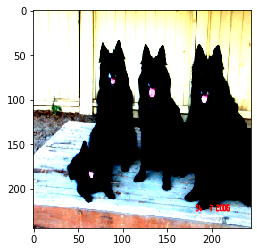

In [5]:
# Check how images are loaded
images, labels = next(iter(train_loader))

# Display image and label
plt.imshow(images[0].permute(1, 2, 0))
print(labels[8])

In [6]:
# Model Parms
num_classes = 133
device = 'cuda'

In [7]:
# create model from object

In [8]:
res_model = Resnet50_pretrained(num_classes)

In [9]:
res_model = res_model.build()

In [10]:
# Train Model

In [11]:
# Train Params
n_epochs = 1
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [12]:
# model = train(res_model, n_epochs, data_loaders, optimizer,
#                     criterion, device, save_path)

In [13]:
# refactor to functions

In [14]:
# train the model
# model_transfer = res_model.train(n_epochs, data_loaders, optimizer_transfer, criterion_transfer, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
res_model.load_state_dict(torch.load('trained_models/model_transfer.pt'))

<All keys matched successfully>

In [15]:
# getimages image folder
images = glob.glob("images/*")

In [16]:
images

['images\\American_water_spaniel_00648.jpg',
 'images\\Brittany_02625.jpg',
 'images\\Curly-coated_retriever_03896.jpg',
 'images\\dalmation.jpg',
 'images\\doggo.jpg',
 'images\\doggo2.jpg',
 'images\\elon-musk.jpg',
 'images\\jhoward.jfif',
 'images\\Labrador_retriever_06449.jpg',
 'images\\Labrador_retriever_06455.jpg',
 'images\\Labrador_retriever_06457.jpg',
 'images\\lex.jfif',
 'images\\sage.jfif',
 'images\\sample_cnn.png',
 'images\\sample_dog_output.png',
 'images\\sample_human_output.png',
 'images\\sora.jfif',
 'images\\Welsh_springer_spaniel_08203.jpg']

In [17]:
break

SyntaxError: 'break' outside loop (<ipython-input-17-6aaf1f276005>, line 4)

In [18]:
for image in images:
    predict(res_model,image,device)

55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
